# MIROC4m >100 year Nino3.4 analysis

In [1]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import eofs
# from eofs.xarray import Eof
import cftime
import nc_time_axis

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import linregress

import mtspec

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

%load_ext autoreload
%autoreload 2

## Data access:

MIROC4m 100-500 year Niño3.4 index files have been uploaded by Wing-Le Chan onto the 'Leeds server' (access through Alan Haywood, a.m.haywood@leeds.ac.uk). Last access: 30 april 2021.

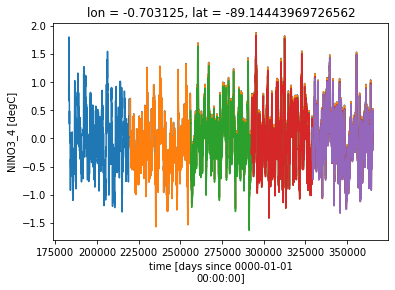

In [204]:
for i in range(5):
    years = yearlist[4-i]

    run = 'E280'
    file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
    ds = xr.open_dataset(file, decode_times=False)
    ds.NINO3_4.plot()
    


### Nino3.4 standard deviation

In [3]:
model = 'MIROC4m'
yearlist = ['100', '200', '300', '400', '500'];

nino500_e280 = xr.open_dataset('models/MIROC4m/MIROC4m_E280_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4
nino500_eoi400 = xr.open_dataset('models/MIROC4m/MIROC4m_Eoi400_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4

std2_e280 = np.zeros(len(yearlist))
std2_eoi400 = np.zeros(len(yearlist))
N = 1200
for i in range(len(yearlist)):
    std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)].std()
    std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)].std() 

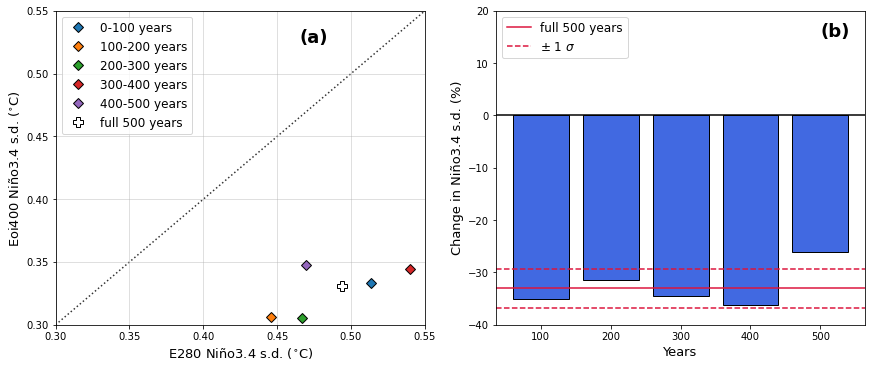

In [41]:
model = 'MIROC4m'
yearlist = ['100', '200', '300', '400', '500'];
legends = ['0-100', '100-200', '200-300', '300-400', '400-500']

std_e280 = np.zeros(len(yearlist))
std_eoi400 = np.zeros(len(yearlist))

for i in range(len(yearlist)):
    years = yearlist[i]

    run = 'E280'
    file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
    ds = xr.open_dataset(file, decode_times=False)
    std_e280[i] = ds.NINO3_4.std()
    
    run = 'Eoi400'
    file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
    ds = xr.open_dataset(file, decode_times=False)
    std_eoi400[i] = ds.NINO3_4.std()
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), constrained_layout=True)

lims = [0.3, 0.55]
# ax[0].plot(std_e280, std_eoi400, 'k-')
# for j in range(len(yearlist)):
#     ax[0].plot(std_e280[j], std_eoi400[j], 'D', label = f'{yearlist[j]} years', markersize = 7, markeredgecolor ='k')
# ax[0].plot(std2_e280[:-1], std2_eoi400[:-1], 'D', markersize = 7, markeredgecolor ='k', color='tab:blue')
for j in range(len(yearlist)):
    ax[0].plot(std2_e280[j], std2_eoi400[j], 'D', label = f'{legends[j]} years', markersize = 7, markeredgecolor ='k')
ax[0].plot(std_e280[-1], std_eoi400[-1], 'P', markersize = 10, markeredgecolor ='k', color='w', label='full 500 years')
ax[0].plot(lims, lims, 'k:', alpha=0.8, zorder = -1)
ax[0].set_xlim(lims); ax[0].set_ylim(lims);
ax[0].set_xlabel(r'E280 Niño3.4 s.d. ($^{\circ}$C)', fontsize=13)
ax[0].set_ylabel(r'Eoi400 Niño3.4 s.d. ($^{\circ}$C)',fontsize=13)
ax[0].legend(loc = 'upper left', fontsize = 12)
ax[0].grid(alpha=0.5);
ax[0].text(0.465, 0.525, '(a)', fontsize = 18, fontweight = 'bold')
# ax[0].text(0.445, 0.355, '100y', fontsize = 13)
# ax[0].text(0.49, 0.315, '500y', fontsize = 13)

years = [100, 200, 300, 400, 500]
# xlims = [75, 525]
# ax[1].plot(years, 100*std_e280/std_e280[-1], 'rx--', markersize = 7, label = 'E280')
# ax[1].plot(years, 100*std_eoi400/std_eoi400[-1], 'bo--', markersize = 7, label = 'Eoi400')
# ax[1].plot(xlims, [100,100], 'k:', alpha=0.8, zorder = -1)
# ax[1].set_ylim([93, 107]); ax[1].set_xlim(xlims)
# ax[1].set_xlabel('Years analysed', fontsize=13)
# ax[1].set_ylabel(r'Niño3.4 s.d. deviation (%)', fontsize=13)
# ax[1].legend(loc = 'upper right', fontsize = 12)
# ax[1].set_xticks(years)
# ax[1].set_xticklabels(years)
# # ax[1].grid(alpha=0.5)
# ax[1].text(340, 105.5, '(b)', fontsize = 18, fontweight = 'bold')

perc = 100*(std2_eoi400 - std2_e280)/std2_e280
perc500 = 100*(std_eoi400[-1] - std_e280[-1])/std_e280[-1]

ax[1].bar(yearlist, perc, edgecolor='k', color='royalblue')
ax[1].set_xlabel('Years', fontsize=13)
ax[1].set_ylabel('Change in Niño3.4 s.d. (%)', fontsize=13)
ax[1].set_ylim([-40, 20])
ax[1].axhline([0],color='k')
ax[1].axhline([perc500], color='crimson', label='full 500 years')
ax[1].axhline([perc500+np.std(perc)], color='crimson', linestyle = '--', label='$\pm$ 1 $\sigma$')
ax[1].axhline([perc500-np.std(perc)], color='crimson', linestyle = '--')
# ax[1].set_xticks(years)
# ax[1].set_xticklabels(years)
ax[1].set_xlabel('Years', fontsize=13)
ax[1].legend(loc = 'upper left', fontsize = 12)
ax[1].text(4, 15, '(b)', fontsize = 18, fontweight = 'bold')

plt.savefig('figures/appendixfigure6v2.pdf', bbox_inches='tight')

In [52]:
np.std(perc)

3.682415410103363

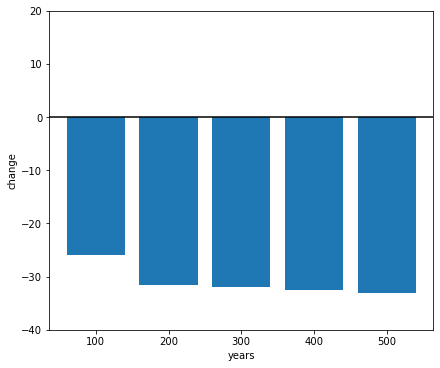

In [235]:
model = 'MIROC4m'
yearlist = ['100', '200', '300', '400', '500'];

std_e280 = np.zeros(len(yearlist))
std_eoi400 = np.zeros(len(yearlist))

for i in range(len(yearlist)):
    years = yearlist[i]

    run = 'E280'
    file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
    ds = xr.open_dataset(file, decode_times=False)
    std_e280[i] = ds.NINO3_4.std()
    
    run = 'Eoi400'
    file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
    ds = xr.open_dataset(file, decode_times=False)
    std_eoi400[i] = ds.NINO3_4.std()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5), constrained_layout=True)

perc = 100*(std_eoi400 - std_e280)/std_e280

ax.bar(yearlist, perc)
ax.set_xlabel('years')
ax.set_ylabel('change')
ax.set_ylim([-40, 20])
ax.axhline([0],color='k')

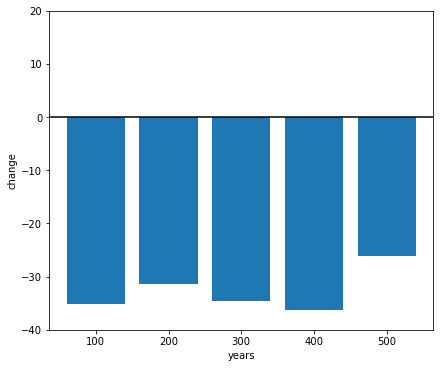

In [11]:

nino500_e280 = xr.open_dataset('models/MIROC4m/MIROC4m_E280_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4
nino500_eoi400 = xr.open_dataset('models/MIROC4m/MIROC4m_Eoi400_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4


std2_e280 = np.zeros(len(yearlist))
std2_eoi400 = np.zeros(len(yearlist))
N = 1200
for i in range(len(yearlist)):
    std2_e280[i] = nino500_e280[(i*N):((i+1)*N-1)].std()
    std2_eoi400[i] = nino500_eoi400[(i*N):((i+1)*N-1)].std()


yearlist = ['100', '200', '300', '400', '500'];


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5), constrained_layout=True)

perc = 100*(std2_eoi400 - std2_e280)/std2_e280

ax.bar(yearlist, perc)
ax.set_xlabel('years')
ax.set_ylabel('change')
ax.set_ylim([-40, 20])
ax.axhline([0],color='k')

### Nino3.4 spectral analysis

In [42]:
from defs import MT_spectrum, Confidence_intervals

In [47]:
nino500_e280.flatten()

array([0.924, 0.673, 0.783, ..., 0.196, 0.205, 0.334], dtype=float32)

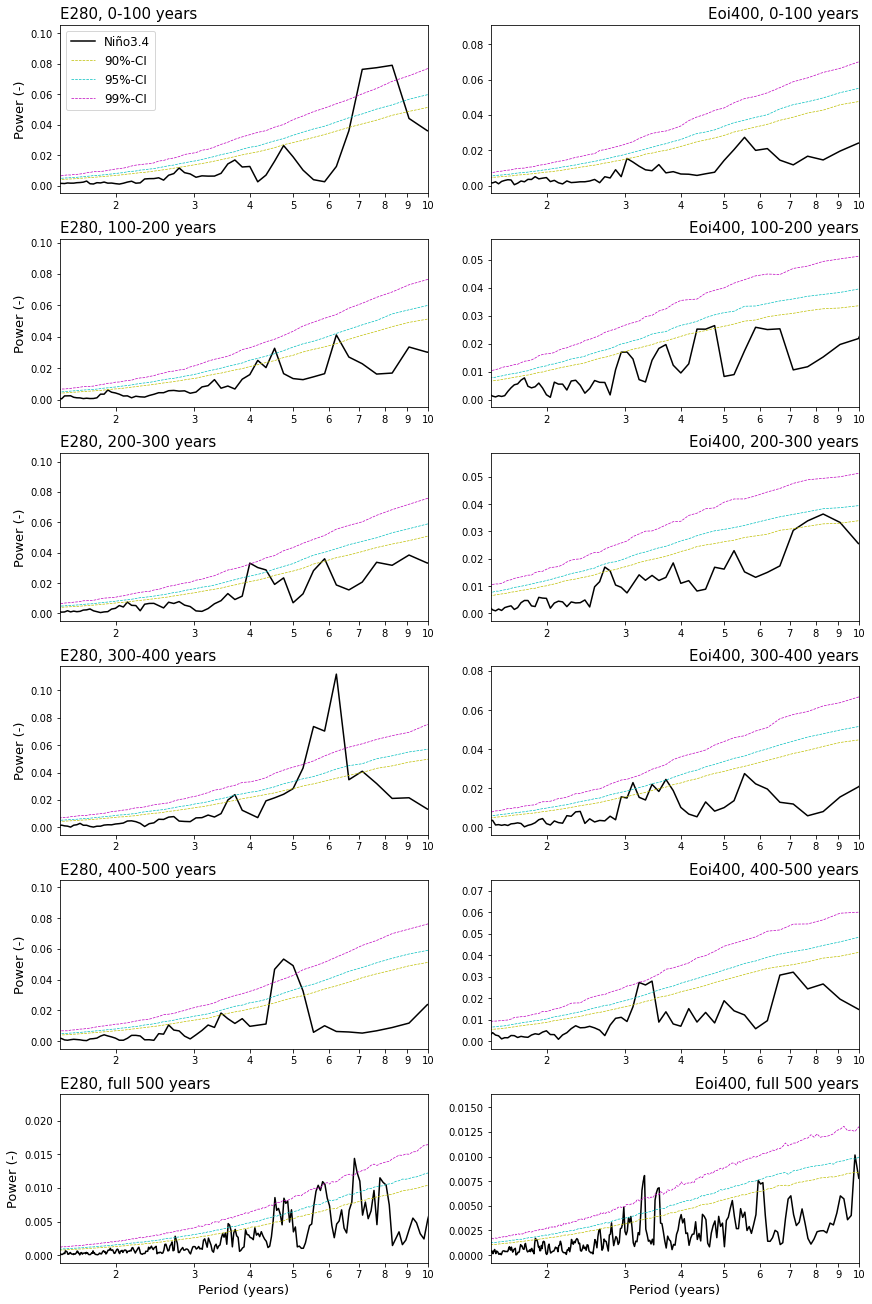

In [49]:
nino500_e280 = xr.open_dataset('models/MIROC4m/MIROC4m_E280_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4.values.flatten()
nino500_eoi400 = xr.open_dataset('models/MIROC4m/MIROC4m_Eoi400_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4.values.flatten()

N = 1200
legends = ['0-100', '100-200', '200-300', '300-400', '400-500', 'full 500']

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18), constrained_layout=True)

norm = True; scale = True; trend = "none"; Nsur = 10000;
ticklocs = [2,3,4,5,6,7,8,9,10]

for i in range(len(yearlist)+1):

#     years = yearlist[i]
    if i<len(yearlist):
        nino = nino500_e280[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_e280
        
    years = legends[i]    
    
#     run = 'E280'
#     file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
#     ds = xr.open_dataset(file, decode_times=False)
#     nino = ds.NINO3_4.values.flatten()
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    axs[i,0].plot(1/(12*freq), spec, 'k', label = 'Niño3.4')
    axs[i,0].plot(1/(12*freq), mt_ci90, 'y--', linewidth=0.7, alpha = 1, label = '90%-CI')
    axs[i,0].plot(1/(12*freq), mt_ci95, 'c--', linewidth=0.7, alpha = 1, label = '95%-CI')
    axs[i,0].plot(1/(12*freq), mt_ci99, 'm--', linewidth=0.7, alpha = 1, label = '99%-CI')
    axs[i,0].set_xlim([1.5, 10])
    axs[i,0].set_xscale("log"); axs[i,0].set_xticks(ticklocs); axs[i,0].set_xticklabels(ticklocs);
#     axs[i,0].set_xlabel('Period (years)', fontsize=13); 
    axs[i,0].set_ylabel('Power (-)', fontsize=13)
    
    if i == 0:
        axs[i,0].legend(loc='upper left', fontsize=12)

#     run = 'Eoi400'
#     file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
#     ds = xr.open_dataset(file, decode_times=False)
#     nino = ds.NINO3_4.values.flatten()

    if i<len(yearlist):
        nino = nino500_eoi400[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_eoi400
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    axs[i,1].plot(1/(12*freq),spec, 'k')
    axs[i,1].plot(1/(12*freq), mt_ci90, 'y--', linewidth=0.7, alpha = 1)
    axs[i,1].plot(1/(12*freq), mt_ci95, 'c--', linewidth=0.7, alpha = 1)
    axs[i,1].plot(1/(12*freq), mt_ci99, 'm--', linewidth=0.7, alpha = 1)
    axs[i,1].set_xlim([1.5, 10])    
    axs[i,1].set_xscale("log"); axs[i,1].set_xticks(ticklocs); axs[i,1].set_xticklabels(ticklocs);
#     axs[i,1].set_xlabel('Period (years)', fontsize=13); axs[i,1].set_ylabel('Power (-)', fontsize=13)
    
    if i==len(yearlist):
        axs[i,0].set_xlabel('Period (years)', fontsize=13);
        axs[i,1].set_xlabel('Period (years)', fontsize=13);
    
    axs[i,0].set_title(f'E280, {years} years', fontsize = 15, loc='left')
    axs[i,1].set_title(f'Eoi400, {years} years', fontsize = 15, loc='right')
    
plt.savefig('figures/appendixfigure9v2.pdf', bbox_inches='tight')

In [192]:
max(1/(12*freq))

100.0

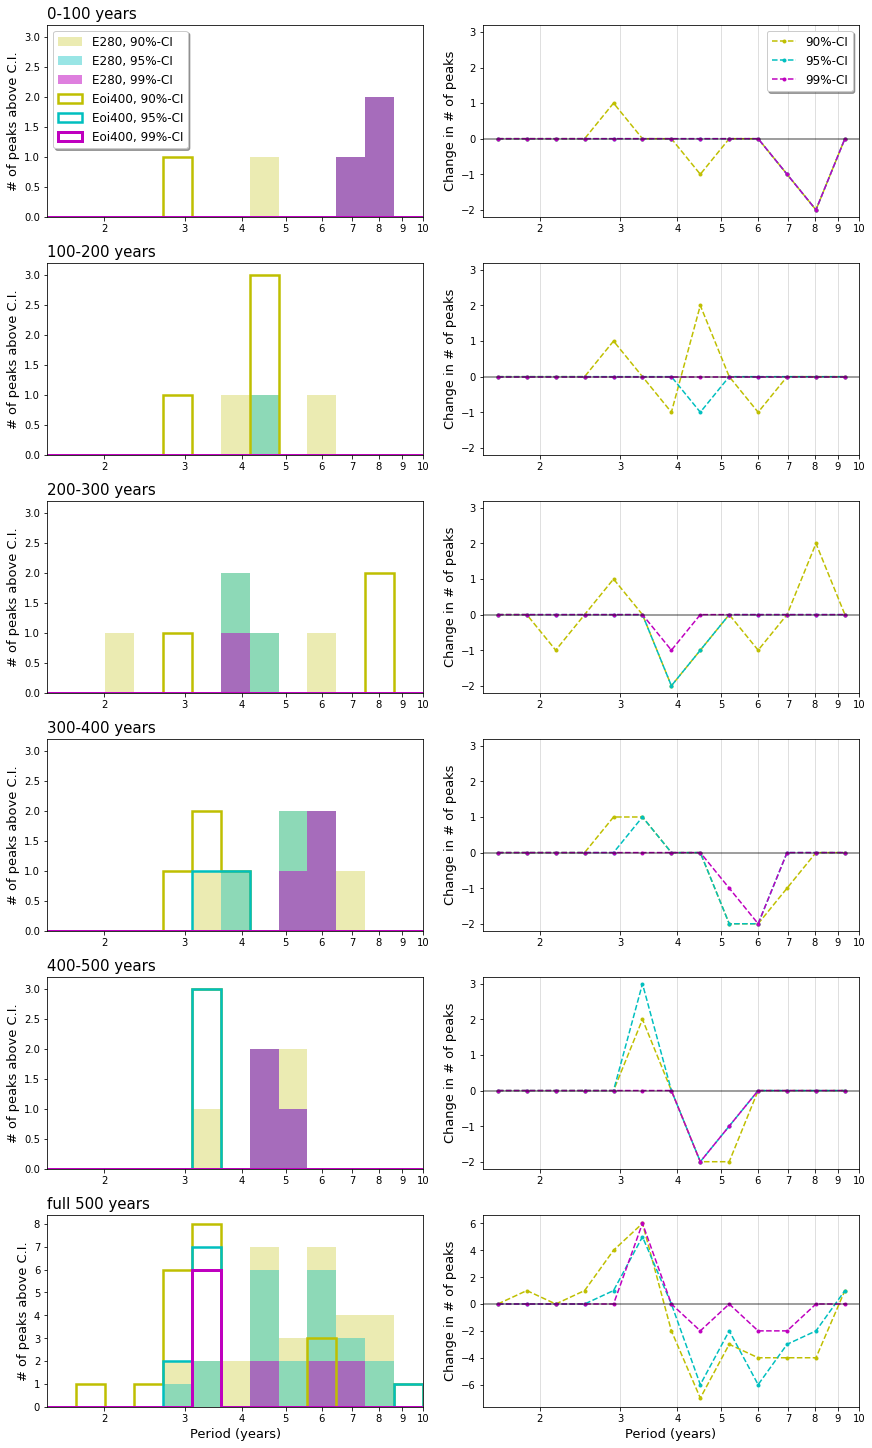

In [51]:
nino500_e280 = xr.open_dataset('models/MIROC4m/MIROC4m_E280_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4.values.flatten()
nino500_eoi400 = xr.open_dataset('models/MIROC4m/MIROC4m_Eoi400_Omon_nino3.4yr500.nc', decode_times=False).NINO3_4.values.flatten()

N = 1200
legends = ['0-100', '100-200', '200-300', '300-400', '400-500', 'full 500']

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 20), constrained_layout=True)

# sumpeaks90 = np.zeros((len(yearlist),2))

norm = True; scale = True; trend = "none"; Nsur = 10000;

binlist = np.logspace(np.log10(1.5), np.log10(10), 14)
ticklocs = [2,3,4,5,6,7,8,9,10]

for i in range(len(yearlist)+1):

#     years = yearlist[i]
    
#     run = 'E280'
#     file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
#     ds = xr.open_dataset(file, decode_times=False)
#     nino = ds.NINO3_4.values.flatten()
    
    if i<len(yearlist):
        nino = nino500_e280[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_e280
        
    years = legends[i]
    
    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)
    
    peaks_90 = np.array([0.]); peaks_95 = np.array([0.]); peaks_99 = np.array([0.]);

    for j in range(1,len(freq)):
        period = 1.0 / freq[j] / 12.0;

        if spec[j] > mt_ci90[j]:
            peaks_90 = np.concatenate((peaks_90, np.array([period])),axis=0)
        if spec[j] > mt_ci95[j]:
            peaks_95 = np.concatenate((peaks_95, np.array([period])),axis=0)
        if spec[j] > mt_ci99[j]:
            peaks_99 = np.concatenate((peaks_99, np.array([period])),axis=0)
            
    peaks_90_1 = peaks_90[1:]; peaks_95_1 = peaks_95[1:]; peaks_99_1 = peaks_99[1:];

    ax[i,0].hist(peaks_90_1,   bins=binlist, color='y', histtype = 'stepfilled', alpha=0.3, label = 'E280, 90%-CI')
    ax[i,0].hist(peaks_95_1,   bins=binlist, color='c', histtype = 'stepfilled', alpha=0.4, label = 'E280, 95%-CI')
    ax[i,0].hist(peaks_99_1,   bins=binlist, color='m', histtype = 'stepfilled', alpha=0.5, label = 'E280, 99%-CI')
    
    if i<len(yearlist):
        nino = nino500_eoi400[(i*N):((i+1)*N-1)]
    else:
        nino = nino500_eoi400
    
#     run = 'Eoi400'
#     file = f'models/{model}/{model}_{run}_Omon_nino3.4yr{years}.nc'
#     ds = xr.open_dataset(file, decode_times=False)
#     nino = ds.NINO3_4.values.flatten()

    freq, spec = MT_spectrum(nino, norm, scale, trend)
    mt_ci90, mt_ci95, mt_ci99 = Confidence_intervals(nino, norm, scale, trend, 'MT', Nsur)

    peaks_90 = np.array([0.]); peaks_95 = np.array([0.]); peaks_99 = np.array([0.]);

    for j in range(1,len(freq)):
        period = 1.0 / freq[j] / 12.0;

        if spec[j] > mt_ci90[j]:
            peaks_90 = np.concatenate((peaks_90, np.array([period])),axis=0)
        if spec[j] > mt_ci95[j]:
            peaks_95 = np.concatenate((peaks_95, np.array([period])),axis=0)
        if spec[j] > mt_ci99[j]:
            peaks_99 = np.concatenate((peaks_99, np.array([period])),axis=0)
            
    peaks_90_2 = peaks_90[1:]; peaks_95_2 = peaks_95[1:]; peaks_99_2 = peaks_99[1:];

    ax[i,0].hist(peaks_90_2, bins=binlist, color='y', histtype = 'step', alpha=1, linewidth=2.5, linestyle='-', label = 'Eoi400, 90%-CI')
    ax[i,0].hist(peaks_95_2, bins=binlist, color='c', histtype = 'step', alpha=1, linewidth=2.5, linestyle='-', label = 'Eoi400, 95%-CI')
    ax[i,0].hist(peaks_99_2, bins=binlist, color='m', histtype = 'step', alpha=1, linewidth=3, linestyle='-', label = 'Eoi400, 99%-CI')

    if i==0:
        ax[i,0].legend(shadow=True, fontsize = 12, loc='upper left')
    ax[i,0].set_ylabel('# of peaks above C.I.', fontsize = 13); 
#     ax[i,0].set_xlabel('Period (years)', fontsize = 13);
    ax[i,0].set_xscale("log"); ax[i,0].set_xticks(ticklocs); ax[i,0].set_xticklabels(ticklocs); ax[i,0].set_xlim([1.5,10])
    if i<len(yearlist):
        ax[i,0].set_ylim([0, 3.2])
    
    ax[i,0].set_title(f'{years} years', loc='left', fontsize =15)

    bincenters = np.array([0.])
    for k in range(len(binlist)-1):
        center = (binlist[k] + binlist[k+1])/2.
        bincenters = np.concatenate((bincenters, np.array([center])),axis=0)
    bincenters = bincenters[1:]

    hist1, _ = np.histogram(peaks_90_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_90_2, bins=binlist)
    diff_90 = hist2 - hist1
#     sumpeaks90[i,0] = np.sum(hist1); sumpeaks90[i,1] = np.sum(hist2)

    hist1, _ = np.histogram(peaks_95_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_95_2, bins=binlist)
    diff_95 = hist2 - hist1

    hist1, _ = np.histogram(peaks_99_1,   bins=binlist)
    hist2, _ = np.histogram(peaks_99_2, bins=binlist)
    diff_99 = hist2 - hist1

    ax[i,1].plot(bincenters, diff_90, color='y', marker='.', linestyle = '--')
    ax[i,1].plot(bincenters, diff_95, color='c', marker='.', linestyle = '--')
    ax[i,1].plot(bincenters, diff_99, color='m', marker='.', linestyle = '--')
    if i<len(yearlist):
        ax[i,1].set_ylim([-2.2, 3.2])

    ax[i,1].set_ylabel('Change in # of peaks', fontsize = 13); 
#     ax[i,1].set_xlabel('Period (years)', fontsize = 13);
    ax[i,1].set_xscale("log"); ax[i,1].set_xticks(ticklocs); ax[i,1].set_xticklabels(ticklocs); ax[i,1].set_xlim([1.5,10])
    ax[i,1].xaxis.grid(alpha=0.5, zorder=-1)
    ax[i,1].axhline(0, color='black', alpha = 0.5);
    if i == 0:
        ax[i,1].legend(['90%-CI', '95%-CI', '99%-CI'], shadow=True, loc='upper right', fontsize = 12);
        
    if i==len(yearlist):
        ax[i,0].set_xlabel('Period (years)', fontsize = 13);
        ax[i,1].set_xlabel('Period (years)', fontsize = 13);

plt.savefig('figures/appendixfigure10.pdf', bbox_inches='tight')

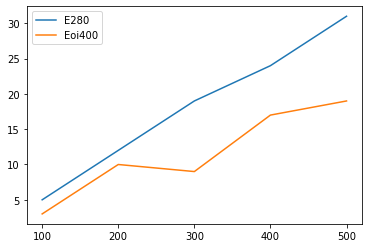

In [172]:
plt.plot(yearlist,sumpeaks90[:,0], label='E280')
plt.plot(yearlist,sumpeaks90[:,1], label='Eoi400')
plt.legend()

(40.0, 90.0)

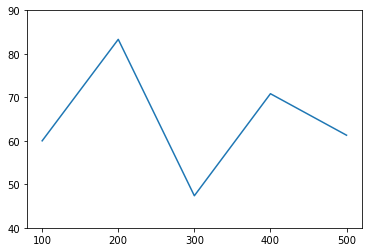

In [176]:
plt.plot(yearlist,100*sumpeaks90[:,1]/sumpeaks90[:,0])
plt.ylim([40, 90])